In [37]:
import pandas as pd

In [38]:
df = pd.read_csv("logatta.csv")

In [39]:
df.head()

,Age,BusinessTravel,Education,MaritalStatus,OverTime,EmployeeNumber,DailyRate,Gender,accepted for the interview
0,41,Travel_Rarely,2,Single,Yes,1,1102,Female,True
1,49,Travel_Frequently,1,Married,No,2,279,Male,False
2,37,Travel_Rarely,2,Single,Yes,4,1373,Male,False
3,33,Travel_Frequently,4,Married,Yes,5,1392,Female,False
4,27,Travel_Rarely,1,Married,No,7,591,Male,False


In [40]:
df.isna().sum()

,0
Age,0
BusinessTravel,0
Education,0
MaritalStatus,0
OverTime,0
EmployeeNumber,0
DailyRate,0
Gender,0
accepted for the interview,0


In [41]:
df["accepted for the interview"].value_counts()

,count
accepted for the interview,
False,1335
True,157


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

In [43]:
print("Columns before encoding:", df.columns)

# Convert 'accepted for the interview' to numeric
df['accepted for the interview'] = df['accepted for the interview'].astype(int)

# Label Encoding for categorical columns
label_encoders = {}
for column in ['BusinessTravel', 'MaritalStatus', 'OverTime', 'Gender']:
    if column in df.columns:
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le
    else:
        print(f"Column '{column}' not found in DataFrame.")

# Check columns after encoding
print("Columns after encoding:", df.columns)
print("First few rows of the DataFrame:\n", df.head())

# Define features and target
X = df.drop('accepted for the interview', axis=1)
y = df['accepted for the interview']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression(max_iter=1000)  # Increased max_iter for convergence
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", class_report)

Columns before encoding: Index(['Age', 'BusinessTravel', 'Education', 'MaritalStatus', 'OverTime',
       'EmployeeNumber', 'DailyRate', 'Gender', 'accepted for the interview'],
      dtype='object')
Columns after encoding: Index(['Age', 'BusinessTravel', 'Education', 'MaritalStatus', 'OverTime',
       'EmployeeNumber', 'DailyRate', 'Gender', 'accepted for the interview'],
      dtype='object')
First few rows of the DataFrame:
    Age  BusinessTravel  Education  MaritalStatus  OverTime  EmployeeNumber  \
0   41               2          2              2         1               1   
1   49               1          1              1         0               2   
2   37               2          2              2         1               4   
3   33               1          4              1         1               5   
4   27               2          1              1         0               7   

   DailyRate  Gender  accepted for the interview  
0       1102       0                           

<ipython-input-45-54143cfeb151>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='accepted for the interview', data=df, palette='viridis')


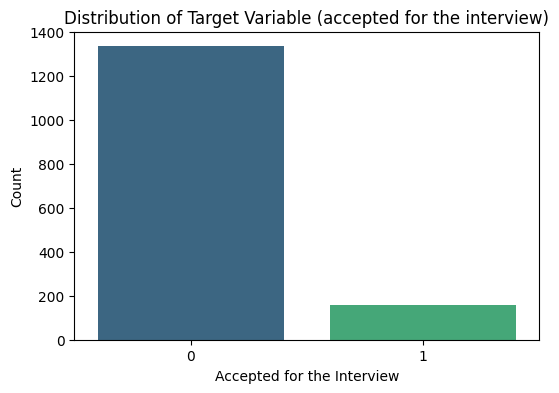

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(x='accepted for the interview', data=df, palette='viridis')
plt.title('Distribution of Target Variable (accepted for the interview)')
plt.xlabel('Accepted for the Interview')
plt.ylabel('Count')
plt.show()

<ipython-input-46-92e640c6ca20>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance, y=feature_names, palette='viridis')


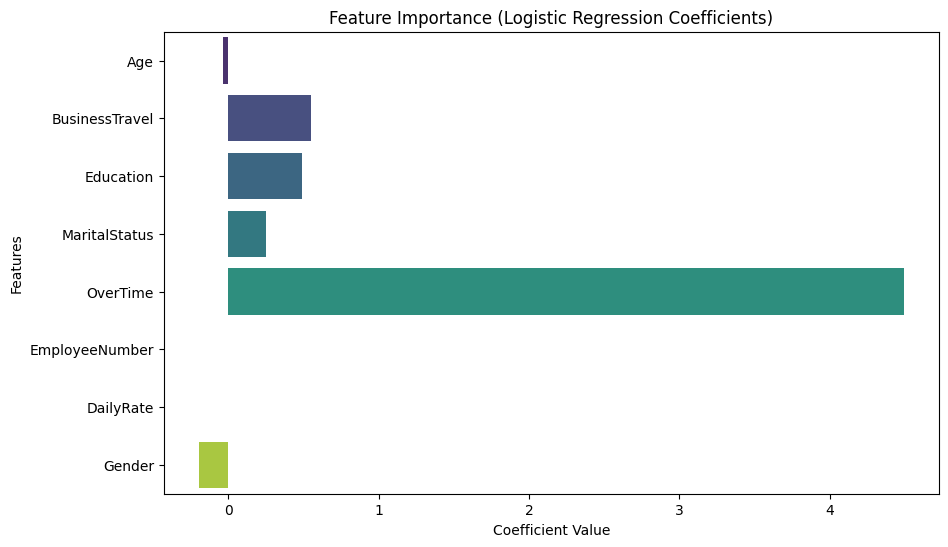

In [46]:
importance = model.coef_[0]
feature_names = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importance, y=feature_names, palette='viridis')
plt.title('Feature Importance (Logistic Regression Coefficients)')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.show()